## **Importing Required Modules**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier ,StackingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter

In [115]:
df = pd.read_csv(r"E:\Internship Projects\Customer Churn Predictor\Churn_Modelling.csv")

## **Meta Data**

- CustomerId : 
Unique Ids for bank customer identification


- Surname : 
Customer's last name


- CreditScore : 
Credit score of the customer


- Geography : 
The country from which the customer belongs


- Gender : 
Male or Female


- Age : 
Age of the customer


- Tenure : 
Number of years for which the customer has been with the bank


- Balance : 
Bank balance of the customer


- NumOfProducts : 
Number of bank products the customer is utilising


- HasCrCard : 
Binary Flag for whether the customer holds a credit card with the bank or not


- IsActiveMember : 
Binary Flag for whether the customer is an active member with the bank or not


- EstimatedSalary : 
Estimated salary of the customer in Dollars


- Exited : 
Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [116]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
df.shape

(10000, 14)

In [118]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [120]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [121]:
df.drop(columns = ["RowNumber",	"CustomerId"],inplace = True)
df.sample(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8189,Ch'eng,715,France,Male,21,8,0.00,2,1,0,68666.63,0
8505,Caraway,592,France,Male,28,5,137222.77,1,0,0,39608.58,0
8082,K?,772,Spain,Male,36,3,112029.83,1,1,1,186948.35,0


In [122]:
df.duplicated().sum()

np.int64(0)

## **Imbalanced DataSet**

In [123]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

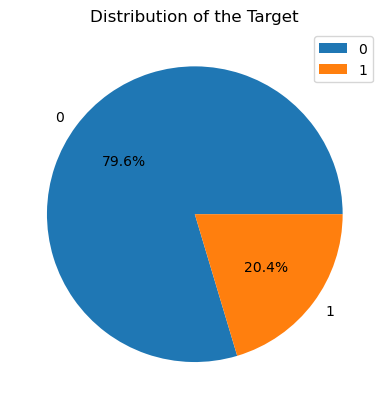

In [124]:
plt.pie(df["Exited"].value_counts(),labels = df["Exited"].value_counts().index,autopct = "%1.1f%%")
plt.title("Distribution of the Target")
plt.legend()
plt.show()

## **Half of the Customers Belong to the country France**

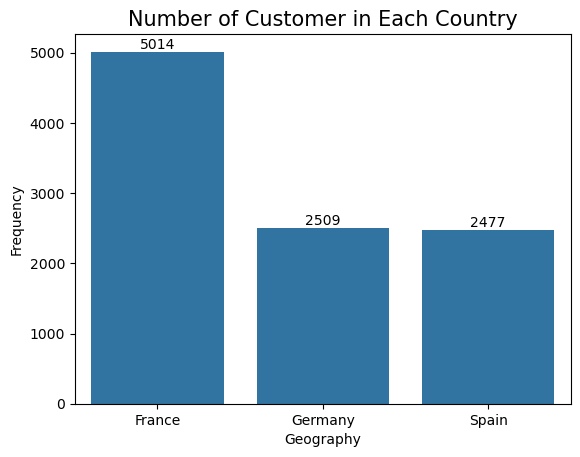

In [125]:
sax = sns.barplot(df["Geography"].value_counts())
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer in Each Country",fontsize = 15)
plt.ylabel("Frequency")
plt.show()

In [126]:
(df.groupby(["Geography"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,Geography,Exited,proportion
0,France,0,83.845233
1,France,1,16.154767
2,Germany,0,67.556796
3,Germany,1,32.443204
4,Spain,0,83.326605
5,Spain,1,16.673395


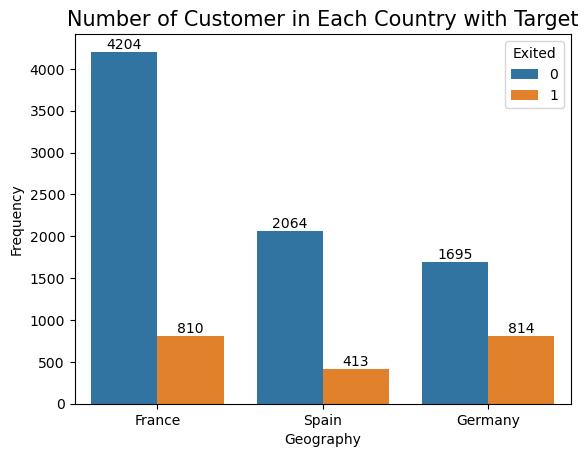

In [127]:
sax = sns.countplot(x = df["Geography"],hue = df["Exited"])
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer in Each Country with Target",fontsize = 15)
plt.ylabel("Frequency")
plt.show()

In [128]:
print(df["Gender"].value_counts())
print(df["Gender"].value_counts(normalize = True))

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64


In [129]:
(df.groupby(["Gender"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,Gender,Exited,proportion
0,Female,0,74.928461
1,Female,1,25.071539
2,Male,0,83.544072
3,Male,1,16.455928


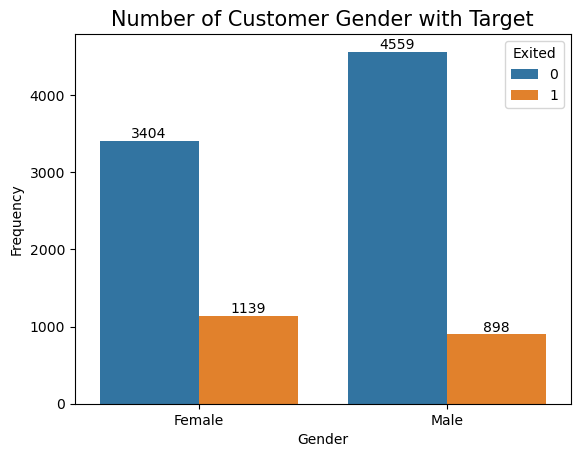

In [130]:
sax = sns.countplot(x = df["Gender"],hue = df["Exited"])
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer Gender with Target",fontsize = 15)
plt.ylabel("Frequency")
plt.show()

In [131]:
(df.groupby(["Geography","Gender"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,Geography,Gender,Exited,proportion
0,France,Female,0,79.655020
1,France,Female,1,20.344980
2,France,Male,0,87.286596
3,France,Male,1,12.713404
4,Germany,Female,0,62.447611
5,Germany,Female,1,37.552389
6,Germany,Male,0,72.188450
7,Germany,Male,1,27.811550
8,Spain,Female,0,78.787879
9,Spain,Female,1,21.212121


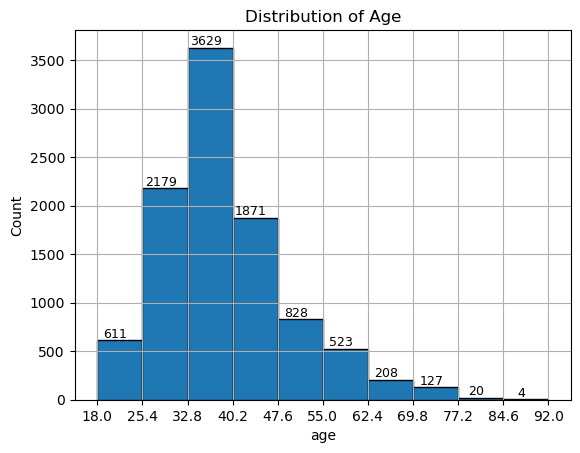

In [132]:
counts, bin_edges, _ = plt.hist(df["Age"], bins=10, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x + 3, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

In [133]:
df["Age"].mean()

np.float64(38.9218)

In [134]:
df["Age"].median()

37.0

bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.countplot(df["AgeGroup"])
plt.show()

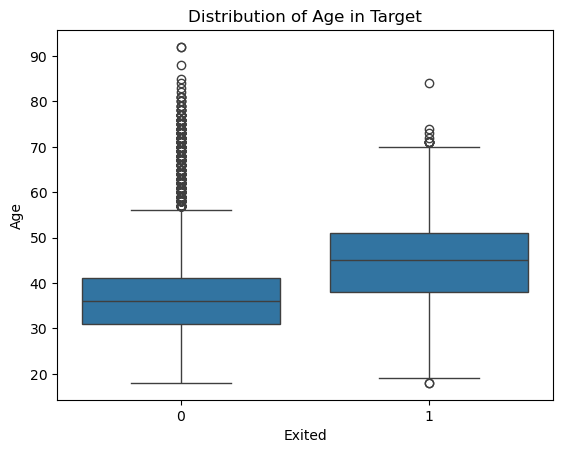

In [135]:
sns.boxplot(x = df["Exited"],y = df["Age"])
plt.title("Distribution of Age in Target")
plt.show()

In [136]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [137]:
(df.groupby(["Tenure"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,Tenure,Exited,proportion
0,0,0,76.997579
1,0,1,23.002421
2,1,0,77.584541
3,1,1,22.415459
4,2,0,80.820611
5,2,1,19.179389
6,3,0,78.889990
7,3,1,21.110010
8,4,0,79.474216
9,4,1,20.525784


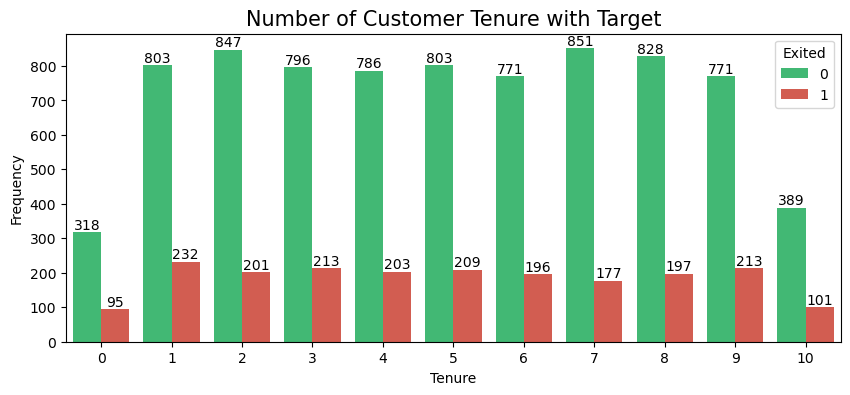

In [138]:
plt.figure(figsize = (10,4))
custom_colors = ["#2ecc71", "#e74c3c"]
sax = sns.countplot(x=df["Tenure"], hue=df["Exited"], palette=custom_colors)
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer Tenure with Target", fontsize=15)
plt.ylabel("Frequency")
plt.show()

In [139]:
df[["Exited","Tenure"]].corr()

,Exited,Tenure
Exited,1.000000,-0.014001
Tenure,-0.014001,1.000000


In [140]:
print(df["NumOfProducts"].value_counts())
print(df["NumOfProducts"].value_counts(normalize = True)  *  100)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64


In [141]:
(df.groupby(["NumOfProducts"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,NumOfProducts,Exited,proportion
0,1,0,72.285602
1,1,1,27.714398
2,2,0,92.418301
3,2,1,7.581699
4,3,1,82.706767
5,3,0,17.293233
6,4,1,100.000000


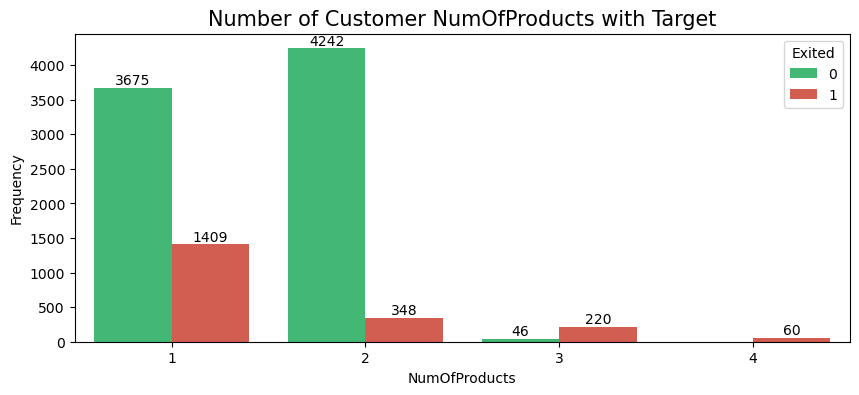

In [142]:
plt.figure(figsize = (10,4))
custom_colors = ["#2ecc71", "#e74c3c"]
sax = sns.countplot(x=df["NumOfProducts"], hue=df["Exited"], palette=custom_colors)
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer NumOfProducts with Target", fontsize=15)
plt.ylabel("Frequency")
plt.show()

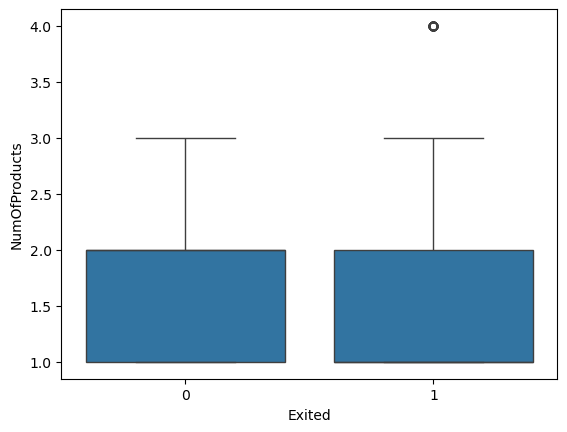

In [143]:
sns.boxplot(x = df["Exited"],y = df["NumOfProducts"])
plt.show()

In [144]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [145]:
(df.groupby(["HasCrCard"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,HasCrCard,Exited,proportion
0,0,0,79.185059
1,0,1,20.814941
2,1,0,79.815734
3,1,1,20.184266


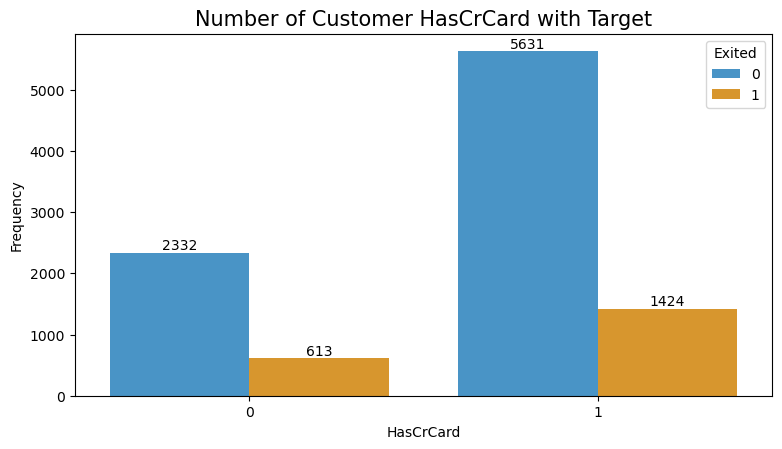

In [146]:
plt.figure(figsize = (9
                      ,4.7))
custom_colors = ["#3498db", "#f39c12"]
sax = sns.countplot(x=df["HasCrCard"], hue=df["Exited"], palette=custom_colors)
for i in sax.containers:
    sax.bar_label(i)
plt.title("Number of Customer HasCrCard with Target", fontsize=15)
plt.ylabel("Frequency")
plt.show()

In [147]:
df["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [148]:
(df.groupby(["IsActiveMember"])["Exited"].value_counts(normalize = True) * 100).reset_index()

,IsActiveMember,Exited,proportion
0,0,0,73.149103
1,0,1,26.850897
2,1,0,85.730926
3,1,1,14.269074


In [149]:
percent_df = (
    df.groupby("IsActiveMember")["Exited"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

count_df = (
    df.groupby("IsActiveMember")["Exited"]
    .value_counts()
    .rename("Count")
    .reset_index()
)

total_df = df.groupby("IsActiveMember").size().reset_index(name="Total")

final_df = pd.merge(percent_df, count_df, on=["IsActiveMember", "Exited"])
final_df = pd.merge(final_df, total_df, on="IsActiveMember")
final_df

,IsActiveMember,Exited,Percentage,Count,Total
0,0,0,73.149103,3547,4849
1,0,1,26.850897,1302,4849
2,1,0,85.730926,4416,5151
3,1,1,14.269074,735,5151


In [150]:
df[["IsActiveMember","Exited"]].corr()

,IsActiveMember,Exited
IsActiveMember,1.000000,-0.156128
Exited,-0.156128,1.000000


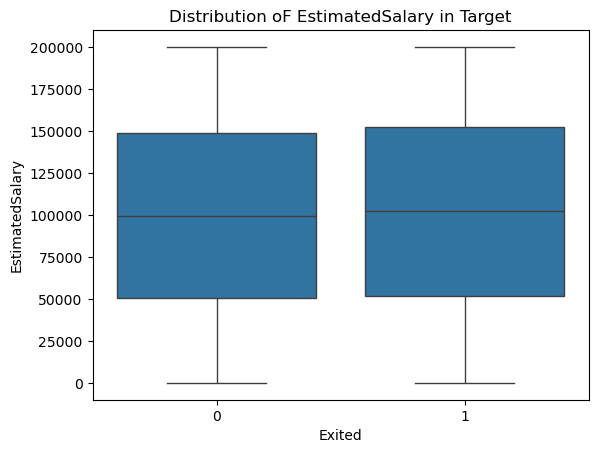

In [151]:
sns.boxplot(x = df["Exited"],y = df["EstimatedSalary"])
plt.title("Distribution oF EstimatedSalary in Target")
plt.show()

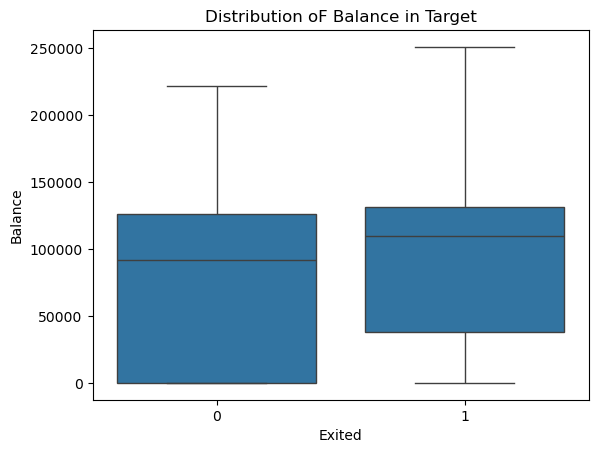

In [152]:
sns.boxplot(x = df["Exited"],y = df["Balance"])
plt.title("Distribution oF Balance in Target")
plt.show()

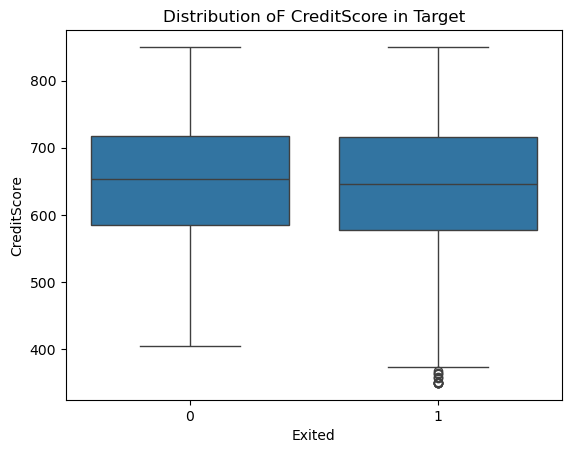

In [153]:
sns.boxplot(x = df["Exited"],y = df["CreditScore"])
plt.title("Distribution oF CreditScore in Target")
plt.show()

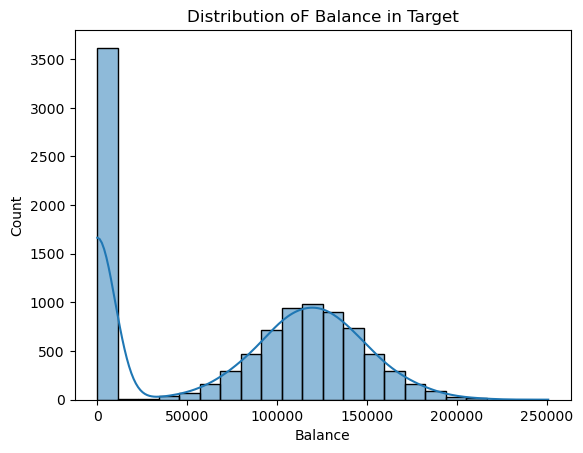

In [154]:
sns.histplot(x = df["Balance"],kde = True)
plt.title("Distribution oF Balance in Target")
plt.show()

In [155]:
df[df["Balance"] == 0].shape

(3617, 12)

In [156]:
df[df["Balance"] == 0]["Exited"].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [157]:
df['Has_Balance'] = (df['Balance'] > 0).astype(int)

In [158]:
df.sample(4)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Has_Balance
4169,Basedow,513,Spain,Female,42,10,0.00,2,0,1,73151.25,0,0
2554,Moss,756,Spain,Male,30,2,145127.85,1,0,0,7554.68,0,1
7442,McDavid,614,Spain,Male,36,5,0.00,2,1,0,130610.78,0,0
9165,Jen,663,Germany,Female,46,2,141726.88,1,1,1,58257.23,0,1


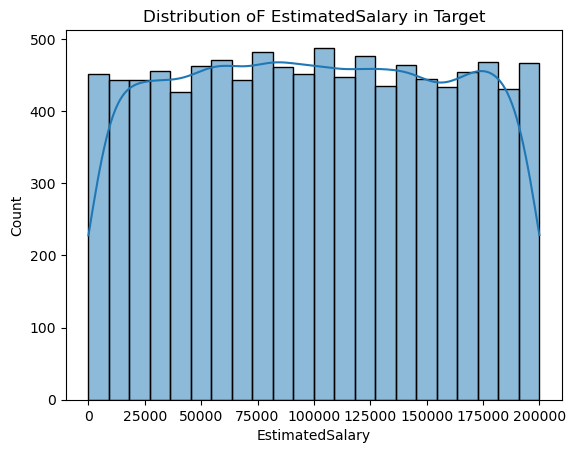

In [159]:
sns.histplot(x = df["EstimatedSalary"],kde = True)
plt.title("Distribution oF EstimatedSalary in Target")
plt.show()

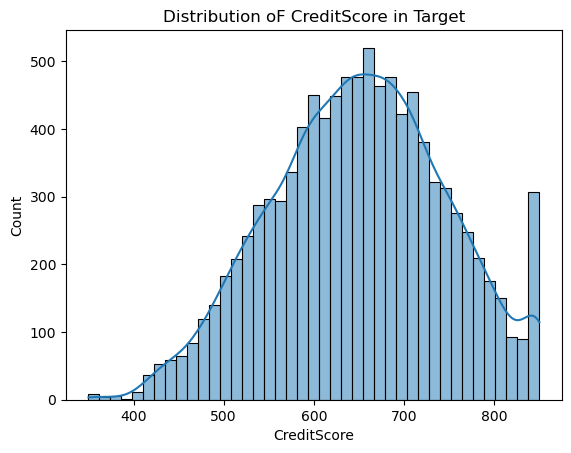

In [160]:
sns.histplot(x = (df["CreditScore"]),kde = True)
plt.title("Distribution oF CreditScore in Target")
plt.show()

In [161]:
df.drop(columns = ["Surname"],inplace = True)

In [162]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Has_Balance          int64
dtype: object

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]

# Separate categorical and numerical variables
categorical_cols = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts", "Has_Balance"]
numerical_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Tenure"]

# Chi-Square test for categorical variables
X_cat = df_encoded[categorical_cols]
chi2_scores, chi2_pvalues = chi2(X_cat, y)
chi2_results = pd.DataFrame({
    "Feature": categorical_cols,
    "Chi2 Score": chi2_scores,
    "P-Value": chi2_pvalues
})

# ANOVA F-test for numerical variables
X_num = df_encoded[numerical_cols]
f_scores, f_pvalues = f_classif(X_num, y)
f_results = pd.DataFrame({
    "Feature": numerical_cols,
    "F-Score": f_scores,
    "P-Value": f_pvalues
})

# Display results
print("Chi-Square Test Results (Categorical Features):\n")
print(chi2_results.sort_values("P-Value"))

print("\nANOVA F-Test Results (Numerical Features):\n")
print(f_results.sort_values("P-Value"))


Chi-Square Test Results (Categorical Features):

          Feature  Chi2 Score       P-Value
3  IsActiveMember  118.199414  1.568036e-27
5     Has_Balance   54.151200  1.856405e-13
1          Gender   51.539926  7.015575e-13
0       Geography   11.853251  5.756078e-04
4   NumOfProducts    5.055394  2.454940e-02
2       HasCrCard    0.150041  6.984962e-01

ANOVA F-Test Results (Numerical Features):

           Feature     F-Score        P-Value
1              Age  886.063275  1.239931e-186
2          Balance  142.473832   1.275563e-32
0      CreditScore    7.344522   6.738214e-03
4           Tenure    1.960164   1.615268e-01
3  EstimatedSalary    1.463262   2.264404e-01


In [164]:
# Chi-Square results
chi2_results["Chi2 Score"] = chi2_results["Chi2 Score"].apply(lambda x: f"{x:.4f}")
chi2_results["P-Value"] = chi2_results["P-Value"].apply(lambda x: f"{x:.6f}")
print("Chi-Square Test Results (Categorical Features):\n")
print(chi2_results)

# ANOVA F-test results
f_results["F-Score"] = f_results["F-Score"].apply(lambda x: f"{x:.4f}")
f_results["P-Value"] = f_results["P-Value"].apply(lambda x: f"{x:.6f}")
print("\nANOVA F-Test Results (Numerical Features):\n")
print(f_results)

Chi-Square Test Results (Categorical Features):

          Feature Chi2 Score   P-Value
0       Geography    11.8533  0.000576
1          Gender    51.5399  0.000000
2       HasCrCard     0.1500  0.698496
3  IsActiveMember   118.1994  0.000000
4   NumOfProducts     5.0554  0.024549
5     Has_Balance    54.1512  0.000000

ANOVA F-Test Results (Numerical Features):

           Feature   F-Score   P-Value
0      CreditScore    7.3445  0.006738
1              Age  886.0633  0.000000
2          Balance  142.4738  0.000000
3  EstimatedSalary    1.4633  0.226440
4           Tenure    1.9602  0.161527


In [165]:
# df.drop(columns = ["EstimatedSalary","Tenure","HasCrCard"],inplace = True)

In [166]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Has_Balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [167]:
df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [168]:
df = df_encoded.astype(float)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Has_Balance,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0,1.0,0.0


In [169]:
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Balance',"EstimatedSalary"]

df[num_cols] = scaler.fit_transform(df[num_cols])

In [170]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Has_Balance,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2.0,-1.225848,1.0,1.0,1.0,0.021886,1.0,0.0,0.0,0.0,0.0
1,-0.440036,0.198164,1.0,0.117350,1.0,0.0,1.0,0.216534,0.0,1.0,0.0,1.0,0.0
2,-1.536794,0.293517,8.0,1.333053,3.0,1.0,0.0,0.240687,1.0,1.0,0.0,0.0,0.0
3,0.501521,0.007457,1.0,-1.225848,2.0,0.0,0.0,-0.108918,0.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,2.0,0.785728,1.0,1.0,1.0,-0.365276,0.0,1.0,0.0,1.0,0.0


In [171]:
x = df.drop("Exited",axis = 1)
y = df["Exited"].astype(int)

In [172]:
x.shape

(10000, 12)

In [173]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [174]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify = y
)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(x_train, y_train)
print("After SMOTE : ", Counter(y_resampled))

After SMOTE :  Counter({1: 6370, 0: 6370})


In [175]:
x_train = X_resampled
y_train = y_resampled

In [176]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

In [177]:
lr = LogisticRegression(max_iter = 1000,penalty = "l2")
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.723
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.40      0.69      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.72      0.75      2000



In [178]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
yhat1 = knn.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.7665
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1593
           1       0.44      0.56      0.49       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



In [179]:
dt = DecisionTreeClassifier(max_depth = 10,random_state = 42)
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.811
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.53      0.63      0.58       407

    accuracy                           0.81      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.81      0.82      2000



In [180]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors = 4)
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [181]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

In [182]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm

In [183]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.4535
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      1593
           1       0.18      0.49      0.27       407

    accuracy                           0.45      2000
   macro avg       0.48      0.47      0.42      2000
weighted avg       0.65      0.45      0.50      2000

[[706 887]
 [206 201]]
For  KN
Accuracy -  0.7665
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1593
           1       0.44      0.56      0.49       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000

[[1306  287]
 [ 180  227]]
For  DT
Accuracy -  0.771
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1593
           1       0.46      0.68      0.55       407

    accuracy                           0.77      20

In [185]:
models = {
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [2,3,4,5,6,7, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50,100, 200],
            "max_depth": [None, 2,4,6,8,10,12,14,20],
            "min_samples_split": [2, 5],
        }
    },
    "ExtraTrees": {
        "model": ExtraTreesClassifier(random_state=42),
        "params": {
            "n_estimators": [50,100, 200],
            "max_depth": [None,2,4,6,8,10,12,14,16,20],
            "min_samples_split": [2, 5],
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1,0,1],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, objective='reg:squarederror'),
        "params": {
            "n_estimators": [50,100, 200],
            "learning_rate": [0.01, 0.1,1,0],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20]
        }
    }
}


In [186]:
best_models = {}
for name, config in models.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid.fit(x_train, y_train)
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    y_pred = best_model.predict(x_test)
    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

🔍 Tuning DecisionTree...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.781
[[1348  245]
 [ 193  214]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.47      0.53      0.49       407

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.79      0.78      0.79      2000

🔍 Tuning RandomForest...
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.853
[[1480  113]
 [ 181  226]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.56      0.61       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000

🔍 Tuning ExtraTrees...
Best Parameters: {'ma

In [197]:
DecisionTreeClassifier(max_depth = 10,random_state = 42)
XGBClassifier(n_estimators=50,random_state=2)
RandomForestClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(random_state=42,learning_rate =  0.1, max_depth =  8, n_estimators =  200)
ExtraTreesClassifier(max_depth = None, min_samples_split =  2, n_estimators =  200)
print("Best Models")

Best Models


In [205]:
voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100,random_state=2)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=2)),
        ('gb', GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=8, n_estimators=200)),
        ('et', ExtraTreesClassifier(max_depth=None, min_samples_split=2, n_estimators=200))
    ],
    voting='hard'
)

voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)

print("Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

Voting Classifier
Accuracy: 0.8525
[[1479  114]
 [ 181  226]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.66      0.56      0.61       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.84      0.85      0.85      2000



In [204]:
base_estimators = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(random_state=42, objective='reg:squarederror', learning_rate=0.1, max_depth=7, n_estimators=200)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=8, n_estimators=200)),
    ('et', ExtraTreesClassifier(max_depth=None, min_samples_split=2, n_estimators=200))
]

meta_model = RandomForestClassifier(n_estimators=50, random_state=2)

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(x_train, y_train)
y_pred_stacking = stacking_clf.predict(x_test)

print("Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

Stacking Classifier
Accuracy: 0.8475
[[1538   55]
 [ 250  157]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.74      0.39      0.51       407

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



## **Final Model is The Voting Classifier With 85 percent Accuracy**

In [206]:
voting_clf

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=No...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('rf', RandomForestClassifier(random_state=2)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=8,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('et', ExtraTreesClassifier(n_estimators=200))])

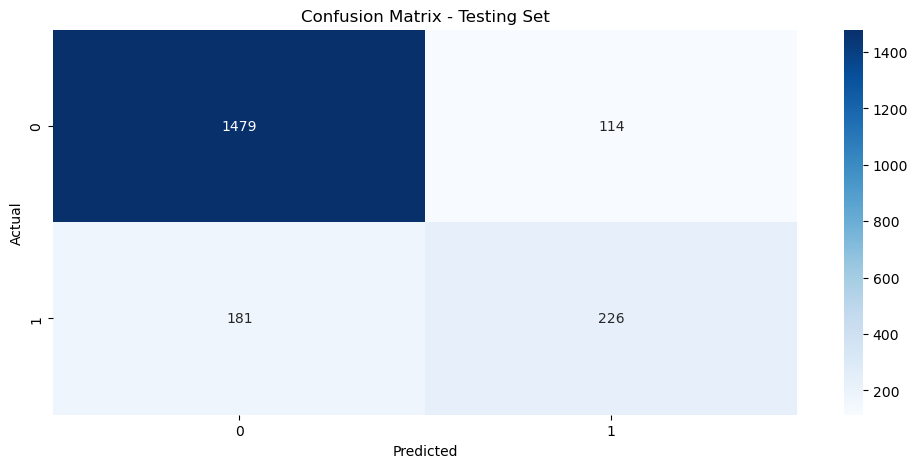

In [207]:
cm_test = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(12, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [193]:
import pickle

In [209]:
pickle.dump(voting_clf,open("11Churn_stacking_clf.pkl","wb"))
pickle.dump(scaler, open('Churn_scaler.pkl','wb'))

In [195]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Has_Balance',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [196]:
# These are the columns on which Scaler is applied
num_cols = ['CreditScore', 'Age', 'Balance',"EstimatedSalary"]